## 数値解析レポート第12回
### 氏名：NOH, HYEONSEO　学籍番号：08B22164
ポアソン方程式
$$
\frac{\partial^2T}{\partial x^2}+\frac{\partial^2T}{\partial y^2} = f(x,y) \tag{*}
$$
を，$x, y$方向ともに$\Delta x=\Delta y=1$で3分割した時の
1. $T_{1,1}, T_{1,2}, T_{2,1}, T_{2,2}$が満たす方程式を求めよ．
2. $T_{1,1}, T_{1,2}, T_{2,1}, T_{2,2}$を求めよ．

ただし，$f(x,y)$は
$$
f(x,y) = \begin{cases}
-600　(x=1, y=2)\\
0　　　(それ以外)
\end{cases}
$$
とする．境界条件は，
$$
\eta_1=0, \eta_2=0, \eta_3=0, \eta_4=100, \eta_5=200, \eta_6=200, \\
\eta_7=100, \eta_8=0, \eta_9=0, \eta_{10}=0, \eta_{11}=0, \eta_{12}=0
$$
である．

### 1. $T_{1,1},  T_{1,2}, T_{2,1}, T_{2,2}$が満たす方程式を求めよ．
ラプラス方程式の場合と同様に求める．
温度$T(x,y)$についてTaylor展開すると
$$
\begin{align}
T(x+\Delta x,y) &= T(x,y) + \Delta xT_x(x,y)+\frac{\Delta x^2}{2}T_{xx}(x,y) + \cdots \tag{1} \\ 
T(x-\Delta x,y) &= T(x,y) - \Delta xT_x(x,y)+\frac{\Delta x^2}{2}T_{xx}(x,y) + \cdots \tag{2} \\
T(x,y+\Delta y) &= T(x,y) + \Delta yT_y(x,y)+\frac{\Delta y^2}{2}T_{yy}(x,y) + \cdots \tag{3} \\ 
T(x,y-\Delta y) &= T(x,y) - \Delta yT_y(x,y)+\frac{\Delta y^2}{2}T_{yy}(x,y) + \cdots \tag{4} \\ 
\end{align}
$$
となる．ただし，
$$
T_x(x,y) =\frac{\partial T}{\partial x},  T_{xx}(x,y) =\frac{\partial^2 T}{\partial x^2},  
T_y(x,y) =\frac{\partial T}{\partial y},  T_{yy}(x,y) =\frac{\partial^2 T}{\partial y^2}
$$
である．
$(1)+(2)$より
$$
\frac{\partial^2 T}{\partial^2 x} = \frac{1}{(\Delta x)^2} \big( T(x+\Delta x,y)+T(x-\Delta x,y)-2T(x,y) \big) \tag{5}
$$
となる．また，$(3)+(4)$より
$$
\frac{\partial^2 T}{\partial^2 y} = \frac{1}{(\Delta y)^2} \big( T(x,y+\Delta y)+T(x,y-\Delta y)-2T(x,y) \big) \tag{6}
$$
となる．式$(5),(6)$をポアソン方程式$(*)$に代入すると
$$
T(x,y)-pT(x-\Delta x,y)-pT(x+\Delta x,y)-qT(x,y-\Delta y)-qT(x,y+\Delta y) + \frac{1}{2}\bigg(\frac{1}{(\Delta x)^2} + \frac{1}{(\Delta y)^2}\bigg)^{-1} f = 0 \tag{7}
$$
となる．ただし，
$$
p = \frac{1}{2(\Delta x)^2}\bigg(\frac{1}{(\Delta x)^2} + \frac{1}{(\Delta y)^2}\bigg)^{-1}
\\
q = \frac{1}{2(\Delta y)^2}\bigg(\frac{1}{(\Delta x)^2} + \frac{1}{(\Delta y)^2}\bigg)^{-1}
$$
である．
今，$\Delta x=\Delta y=1$なので
$$
p = q = \frac{1}{4}
$$
である．よって，
$$
\frac{1}{2}\bigg(\frac{1}{(\Delta x)^2} + \frac{1}{(\Delta y)^2}\bigg)^{-1} f=\frac{1}{4} f = pf
$$
とかける．
式$(7)$の$(x,y)$に$(1,1),(1,2),(2,1),(2,2)$を代入すると
$$
\begin{align}
T_{1,1} - p\eta_{12}-pT_{1,2}-q\eta_2-qT_{2,1}+pf(1,1) &=0 \\
T_{1,2} - pT_{1,1}-p\eta_5-q\eta_3-qT_{2,2}+pf(1,2) &=0 \\
T_{2,1} - p\eta_{11}-pT_{2,2}-qT_{1,1} - q\eta_9+pf(2,1) &=0 \\
T_{2,2} - pT_{2,1} -p\eta_6-qT_{1,2}-q\eta_8+pf(2,2) &=0 \\
\end{align}
$$
が得られる．これを行列表記すると次のようになる．
$$
\begin{equation}
    \begin{bmatrix}
    1 & -p & -q & 0 \\
    -p & 1 & 0 & -q \\
    -q & 0 & 1 & -p \\
    0 & -q & -p & 1 \\
    \end{bmatrix}
    \begin{bmatrix}
    T_{1,1} \\
    T_{1,2} \\
    T_{2,1} \\
    T_{2,2} \\
    \end{bmatrix}
    = 
    \begin{bmatrix}
    p\eta_{12}+q\eta_2-pf(1,1) \\
    p\eta_{5}+q\eta_3-pf(1,2) \\
    p\eta_{11}+q\eta_9-pf(2,1) \\
    p\eta_{6}+q\eta_8-pf(2,2) \\
    \end{bmatrix}
\end{equation}
$$

### 2. $T_{1,1}, T_{1,2}, T_{2,1}, T_{2,2}$を求めよ．
上の式と境界条件を用いて$T_{1,1}, T_{1,2}, T_{2,1}, T_{2,2}$を求めていく．

In [7]:
import numpy as np

p = 0.25
q = 0.25

def f(x, y):
    if x == 1 and y == 2:
        return -600
    else:
        return 0

#境界条件
def eta(x,y):
    if x == 3:
        if y == 0 or y == 3:
            return 100
        else:
            return 200
    else:
        return 0

eta1 = eta(0,0)
eta2 = eta(1,0)
eta3 = eta(2,0)
eta4 = eta(3,0)
eta5 = eta(3,1)
eta6 = eta(3,2)
eta7 = eta(3,3)
eta8 = eta(2,3)
eta9 = eta(1,3)
eta10 = eta(0,3)
eta11 = eta(0,2)
eta12 = eta(0,1)

In [8]:
A = np.array([[1, -p, -q, 0], 
              [-p, 1,0, -q],
              [-q,0,1,-p],
              [0, -q, -p,1]])

B = np.array([[p*eta12+q*eta2-p*f(1,1)],
              [p*eta5+q*eta3-p*f(1,2)], 
              [p*eta11+q*eta9-p*f(2,1)],
              [p*eta6+q*eta8-p*f(2,2)]])

この行列をライブラリーを用いて計算すると次のように求まる．

In [9]:
T=np.linalg.solve(A,B)
T

array([[ 75.],
       [250.],
       [ 50.],
       [125.]])

解をまとめて書くと

In [10]:
ans = np.array([[eta1, eta2, eta3, eta4], 
                [eta12, T[0,0], T[1,0], eta5], 
                [eta11, T[2,0], T[3,0], eta6], 
                [eta10, eta9, eta8, eta7]])
ans

array([[  0.,   0.,   0., 100.],
       [  0.,  75., 250., 200.],
       [  0.,  50., 125., 200.],
       [  0.,   0.,   0., 100.]])

となる．これで$T_{1,1}, T_{1,2}, T_{2,1}, T_{2,2}$が求まった．また，これは次のようにプロットできる．

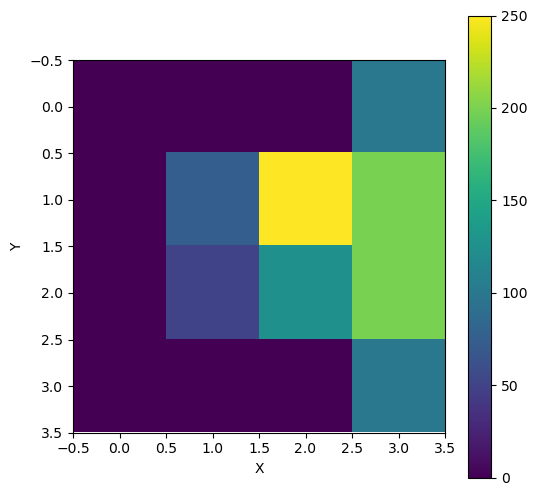

In [11]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6,6))

plt.imshow(ans)
plt.colorbar () 
plt.xlabel('X')
plt.ylabel('Y')
plt.show()